In [1]:
import numpy as np 
import pandas as pd # 기본적으로 활용 할 2개
import re           # 정규식을 활용하여 데이터 정제

In [2]:
f5 = '5_f.xlsx' # 5층 모든 수업
f6 = '6_f.xlsx' # 6층
f7 = '7_f.xlsx'
f8 = '8_f.xlsx'
f9 = '9_f.xlsx'
floors = [f5, f6, f7, f8, f9]
arr = []
for f in floors:
    arr.append(pd.read_excel(f, header=1, usecols=('B, E, F, I'))) # arr에 dataframe 객체 5개를 넣어준다.

df = pd.concat(arr, ignore_index=True) # dataframe 객체 5개를 concat 함수로 합쳐줌
df # 월~금  60주년 기념관에서 0900~1630에시작하는 모든 수업

,과목명,구분,시간 및 강의실,담은 인원
0,초급임상간호영어 및 실습,전공선택,"수16,17,18,19(60주년-501)",27
1,의학영어,전공선택,"월16,17,18,19(60주년-501)",15
2,의학영어,전공선택,"목17,18,19,20(60주년-501)",5
3,의사소통 영어: 중급,교양필수,"화10,11,12,금1,2,3(60주년-501)",20
4,의사소통 영어: 고급,교양필수,"월4,5,6,수1,2,3(60주년-501)",12
...,...,...,...,...
285,기초3D애니메이션,전공필수,"월10,11,12,13,14,15(60주년-908)",28
286,3D 캐릭터 애니메이션,전공선택,"목1,2,3,4,5,6(60주년-908)",7
287,모션캡쳐 스튜디오,전공선택,"금10,11,12,13,14,15(60주년-908)",6
288,AR/VR 영상제작,전공선택,"수4,5,6,7,8,9(60주년-908)",27


In [3]:
print(df.shape)
df = df[df['시간 및 강의실'].str.contains('토') == False] # 토요일에 하는 강의 제거
print(df.shape)
df

(290, 4)
(283, 4)


,과목명,구분,시간 및 강의실,담은 인원
0,초급임상간호영어 및 실습,전공선택,"수16,17,18,19(60주년-501)",27
1,의학영어,전공선택,"월16,17,18,19(60주년-501)",15
2,의학영어,전공선택,"목17,18,19,20(60주년-501)",5
3,의사소통 영어: 중급,교양필수,"화10,11,12,금1,2,3(60주년-501)",20
4,의사소통 영어: 고급,교양필수,"월4,5,6,수1,2,3(60주년-501)",12
...,...,...,...,...
285,기초3D애니메이션,전공필수,"월10,11,12,13,14,15(60주년-908)",28
286,3D 캐릭터 애니메이션,전공선택,"목1,2,3,4,5,6(60주년-908)",7
287,모션캡쳐 스튜디오,전공선택,"금10,11,12,13,14,15(60주년-908)",6
288,AR/VR 영상제작,전공선택,"수4,5,6,7,8,9(60주년-908)",27


In [5]:
df['구분'] = df['구분'].str.replace('교직과정', '전공', regex=True)
df['구분'] = df['구분'].str.replace('전공.*', '전공', regex=True) 
df['구분'].value_counts()

C:\Users\olv01\AppData\Local\Temp\ipykernel_8928\3756788355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['구분'] = df['구분'].str.replace('교직과정', '전공', regex=True)
C:\Users\olv01\AppData\Local\Temp\ipykernel_8928\3756788355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['구분'] = df['구분'].str.replace('전공.*', '전공', regex=True)


교양필수    115
전공       86
교양선택     82
Name: 구분, dtype: int64

In [6]:
df['과목명'] = df['과목명'].str.replace('.*의사소통 영어.*', '의사소통 영어', regex=True)
df['과목명'] = df['과목명'].str.replace('.*실용영어.*', '실용영어', regex=True)
# 의영, 의영 중급, 의영 고급 묶기 ( 수강인원이 같다. )
df['과목명'].value_counts()

C:\Users\olv01\AppData\Local\Temp\ipykernel_8928\2977118114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['과목명'] = df['과목명'].str.replace('.*의사소통 영어.*', '의사소통 영어', regex=True)
C:\Users\olv01\AppData\Local\Temp\ipykernel_8928\2977118114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['과목명'] = df['과목명'].str.replace('.*실용영어.*', '실용영어', regex=True)


의사소통 영어              73
고급대학영어               12
공학윤리와 토론             10
실용영어                 10
문제해결을 위한 글쓰기         10
                     ..
인하특강 : 기업가 정신과 창업     1
나눔 프로젝트               1
영화개론                  1
도시설계                  1
화학해양학 및 실험            1
Name: 과목명, Length: 125, dtype: int64

In [7]:
# 검산, 데이터 분할 (1~4열까지는 예측이 쉬운 데이터, 5~6열은 예측이 필요한 데이터) 
filt = ['의사소통 영어', '고급대학영어', '실용영어', '문제해결을 위한 글쓰기']
string = '|'.join(filt) # '의영 | 고대영 | 실영 | 문해글' 
df1 = df[df['과목명'].str.contains(string)] # string 4개 과목 중 하나인 과목들 (예측이 쉬운)
df2 = df.drop(df1.index) # df2 = df - df1 #4개 과목을 제외한 전공, 교양 개수를 확인 (예측이 어려운 데이터)

print(df1['과목명'].value_counts(), '\n') # df1 value count  
print(df2['구분'].value_counts(), '\n')   # df2 value count  

의사소통 영어         73
고급대학영어          12
실용영어            10
문제해결을 위한 글쓰기    10
Name: 과목명, dtype: int64 

전공      86
교양선택    60
교양필수    32
Name: 구분, dtype: int64 



In [8]:
df1 # 4과목은 인기과목이라 항상 정원이 꽉찬다.

,과목명,구분,시간 및 강의실,담은 인원
3,의사소통 영어,교양필수,"화10,11,12,금1,2,3(60주년-501)",20
4,의사소통 영어,교양필수,"월4,5,6,수1,2,3(60주년-501)",12
5,의사소통 영어,교양필수,"월7,8,9,목1,2,3(60주년-501)",8
6,의사소통 영어,교양필수,"월10,11,12,목4,5,6(60주년-501)",37
7,의사소통 영어,교양필수,"화1,2,3,목10,11,12(60주년-501)",41
...,...,...,...,...
228,문제해결을 위한 글쓰기,교양필수,"셀0(웹강의) /목13,14,15,16(60주년-804)",57
229,문제해결을 위한 글쓰기,교양필수,"화9,10,11,12(60주년-805)",38
230,문제해결을 위한 글쓰기,교양필수,"화13,14,15,16(60주년-805)",35
231,실용영어,교양선택,"월1,2,3,수4,5,6(60주년-805)",25


In [9]:
# 의영, 고영, 실영, 문해글 정원 30명, 거의 모든 분반이 꽉찬다.(오히려 넘칠때도 있음)
del df1['담은 인원']
df1['수강 인원'] = 30
df1

C:\Users\olv01\AppData\Local\Temp\ipykernel_8928\1089665561.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['수강 인원'] = 30


,과목명,구분,시간 및 강의실,수강 인원
3,의사소통 영어,교양필수,"화10,11,12,금1,2,3(60주년-501)",30
4,의사소통 영어,교양필수,"월4,5,6,수1,2,3(60주년-501)",30
5,의사소통 영어,교양필수,"월7,8,9,목1,2,3(60주년-501)",30
6,의사소통 영어,교양필수,"월10,11,12,목4,5,6(60주년-501)",30
7,의사소통 영어,교양필수,"화1,2,3,목10,11,12(60주년-501)",30
...,...,...,...,...
228,문제해결을 위한 글쓰기,교양필수,"셀0(웹강의) /목13,14,15,16(60주년-804)",30
229,문제해결을 위한 글쓰기,교양필수,"화9,10,11,12(60주년-805)",30
230,문제해결을 위한 글쓰기,교양필수,"화13,14,15,16(60주년-805)",30
231,실용영어,교양선택,"월1,2,3,수4,5,6(60주년-805)",30


In [10]:
df2 # 전공은 들을 사람만 담는 경향이 있을 것이라는 가설 -- > 담은 인원과의 상관관계를 파악해서 예측해보자.
    # 교양은 시간표에 전공을 다 채우고 남는 시간에 이것 저것 담아놓을 것이라는 가설. -- > 좌석 수와의 상관관계를 파악해보자.

,과목명,구분,시간 및 강의실,담은 인원
0,초급임상간호영어 및 실습,전공,"수16,17,18,19(60주년-501)",27
1,의학영어,전공,"월16,17,18,19(60주년-501)",15
2,의학영어,전공,"목17,18,19,20(60주년-501)",5
21,"독서세미나 : 인간, 가치, 공존",교양선택,"월1,2,3,화4,5,6(60주년-502)",38
39,조선해양공학연구프로젝트 1,전공,"금15,16(60주년-507)",41
...,...,...,...,...
285,기초3D애니메이션,전공,"월10,11,12,13,14,15(60주년-908)",28
286,3D 캐릭터 애니메이션,전공,"목1,2,3,4,5,6(60주년-908)",7
287,모션캡쳐 스튜디오,전공,"금10,11,12,13,14,15(60주년-908)",6
288,AR/VR 영상제작,전공,"수4,5,6,7,8,9(60주년-908)",27


In [11]:
# 전공, 교양 과목에 대하여 다른 예측방법 df2를 나눠준다.
Major_df = df2[(df2['구분']=='전공') & (df2['담은 인원'].notna())] # 담은 인원수가 결측되지 않은 전공과목 ( 담은 인원 수로 예측 )
Major_df

,과목명,구분,시간 및 강의실,담은 인원
0,초급임상간호영어 및 실습,전공,"수16,17,18,19(60주년-501)",27
1,의학영어,전공,"월16,17,18,19(60주년-501)",15
2,의학영어,전공,"목17,18,19,20(60주년-501)",5
39,조선해양공학연구프로젝트 1,전공,"금15,16(60주년-507)",41
40,인간행동과 사회환경,전공,"수1,2,3,4,5,6(60주년-507)",31
...,...,...,...,...
285,기초3D애니메이션,전공,"월10,11,12,13,14,15(60주년-908)",28
286,3D 캐릭터 애니메이션,전공,"목1,2,3,4,5,6(60주년-908)",7
287,모션캡쳐 스튜디오,전공,"금10,11,12,13,14,15(60주년-908)",6
288,AR/VR 영상제작,전공,"수4,5,6,7,8,9(60주년-908)",27


In [12]:
Goyang_df = df2.drop(Major_df.index) # 나머지는 좌석 수로 예측
del Goyang_df['담은 인원']

In [13]:
# 전공 과목
# 듣는 사람만 듣는 전공과목의 경우 강의를 담은 인원과 상관관계가 있을 것이라는 예측
# 조원들의 데이터를 모아서 상관계수를 구해 선형성을 보았다.

x_0 = np.array([34, 51, 57, 15, 46, 52, 36, 13]) # 상관계수, 시각화 용도
y = np.array([33, 46, 57, 15, 44, 42, 40, 14])

print(np.corrcoef(x_0, y))

# 상관계수 = 0.97, 매우 높다.

[[1.         0.96997063]
 [0.96997063 1.        ]]


[0.87270876]x + 3.2120672097759666


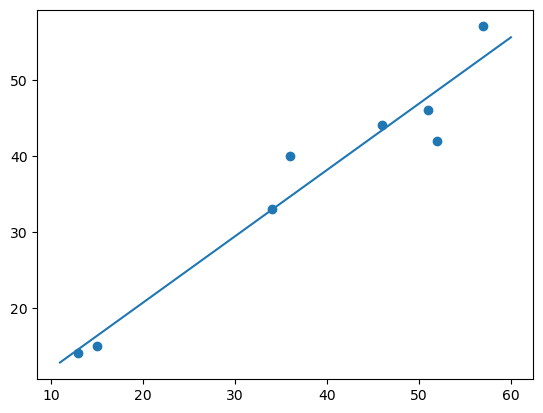

In [14]:
# 선형회귀, 시각화
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

regr = LinearRegression()

x = x_0[:, np.newaxis]  # 선형회귀를 하기 위해서 열벡터로 바꿔준다. 
regr.fit(x, y)
print(f'{regr.coef_}x + {regr.intercept_}') # 담은인원수(X), 수강인원 수(Y) 선형식
# [0.87]x + 3.21 
# 그래프
fig = plt.figure()
plt.scatter(x_0, y)

reg_x = np.linspace(11, 60, 100)
plt.plot(reg_x, (reg_x*regr.coef_ + regr.intercept_))
plt.show()

In [15]:
# 담은 인원 열을 예측한 수강인원 열로 변경
Major_df['수강 인원'] = round(Major_df['담은 인원']*regr.coef_ + regr.intercept_)
del Major_df['담은 인원'] # 담은 인원 열 삭제
Major_df

C:\Users\olv01\AppData\Local\Temp\ipykernel_8928\952485369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Major_df['수강 인원'] = round(Major_df['담은 인원']*regr.coef_ + regr.intercept_)


,과목명,구분,시간 및 강의실,수강 인원
0,초급임상간호영어 및 실습,전공,"수16,17,18,19(60주년-501)",27.0
1,의학영어,전공,"월16,17,18,19(60주년-501)",16.0
2,의학영어,전공,"목17,18,19,20(60주년-501)",8.0
39,조선해양공학연구프로젝트 1,전공,"금15,16(60주년-507)",39.0
40,인간행동과 사회환경,전공,"수1,2,3,4,5,6(60주년-507)",30.0
...,...,...,...,...
285,기초3D애니메이션,전공,"월10,11,12,13,14,15(60주년-908)",28.0
286,3D 캐릭터 애니메이션,전공,"목1,2,3,4,5,6(60주년-908)",9.0
287,모션캡쳐 스튜디오,전공,"금10,11,12,13,14,15(60주년-908)",8.0
288,AR/VR 영상제작,전공,"수4,5,6,7,8,9(60주년-908)",27.0


In [16]:
# 교양과목 + 담은 인원이 결측된 전공과목
# 담는 인원과 실제 수강인원수에는 상관관계가 적고, 교양과목에 대한 담는 인원은 그 과목의 인기도와 상관관계가 있다고 생각
# 담는 인원값을 활용하긴 어렵다. 좌석수로 예측

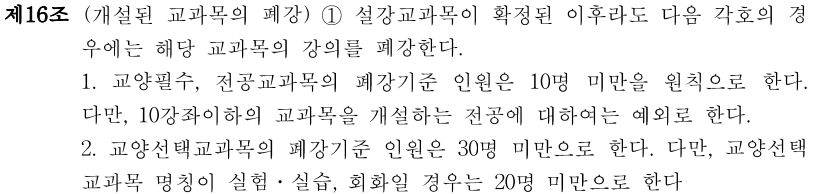

In [17]:
# 교필 - 10명 부터 강의가 생성됨, 전체 열리는 300개 과목 중 30개에 해당한다. 외국인 교필(14), 그냥 교필(16)로 나눈다 (10~57 range가 너무 커서 분할해서 예측, 단 열리는 강의실의 좌석수가 30인경우 30으로(평균이 좌석수보다 많은 경우))
# 교선 - 30명부터 강의가 생성됨, 좌석수는 30, 57, 64
# 30좌석인 경우 강의 인원 30명 !
# 57좌석(30명이 넘는 교양과목), 64좌석(실습실을 쓰는 교양과목)인 강의에 대해서는 조원들 교양과목 실제 수강인원수 평균값으로...
gs = [45, 33, 51]
gp = [11, 24, 40, 47, 49, 47, 47, 42, 48]
f_gp = 14
gs_mean = int(sum(gs)/len(gs))
gp_mean = int(sum(gp)/len(gp))
Goyang_df['수강 인원'] = 0 # 열 만들기
Goyang_df

,과목명,구분,시간 및 강의실,수강 인원
21,"독서세미나 : 인간, 가치, 공존",교양선택,"월1,2,3,화4,5,6(60주년-502)",0
42,선형대수,교양필수,"화4,5,6,목4,5,6(60주년-507)",0
43,지역인문학,교양선택,"화10,11,12(60주년-507)",0
44,공학윤리와 토론,교양선택,"월1,2,3,4,5,6(60주년-507)",0
45,외국인전용 한국의 전통 사회와 문화,교양필수,"화7,8,9,수7,8,9(60주년-507)",0
...,...,...,...,...
249,빅데이터분석,교양필수,"금1,2,3,4(60주년-809)",0
250,컴퓨터프로그래밍,교양필수,"금5,6,7,8(60주년-809)",0
251,컴퓨터프로그래밍,교양필수,"목4,5,6,7,9,10,11,12(60주년-809)",0
252,컴퓨터프로그래밍,교양필수,"목13,14,15,16,17,18,19,20(60주년-809)",0


In [18]:
seat = pd.read_excel('seat.xlsx')
key = seat['unit']
value = seat['seats']
seat_dic = dict(zip(key, value))
cnt = 0
for g in Goyang_df['시간 및 강의실']:
    type_name = df[df['시간 및 강의실'] == g]['구분'].values[0]
    if type_name == '교양선택':
        if int(seat_dic.get(int(g[-4:-1]))) == 30:
            Goyang_df['수강 인원'].values[cnt] = 30
        else:
            Goyang_df['수강 인원'].values[cnt] = gs_mean
    else: #교양 필수
        # 외국인 과목을 따로 처리해준다.
        subject_name = df[df['시간 및 강의실'] == g]['과목명'].values[0]
        if subject_name.startswith('외국인'):
            Goyang_df['수강 인원'].values[cnt] = f_gp
        else:
            if int(seat_dic.get(int(g[-4:-1]))) == 30: # 그 중에 좌석수가 30인 경우
                Goyang_df['수강 인원'].values[cnt] = 30
            else:
                Goyang_df['수강 인원'].values[cnt] = gp_mean
    cnt += 1
Goyang_df

,과목명,구분,시간 및 강의실,수강 인원
21,"독서세미나 : 인간, 가치, 공존",교양선택,"월1,2,3,화4,5,6(60주년-502)",30
42,선형대수,교양필수,"화4,5,6,목4,5,6(60주년-507)",39
43,지역인문학,교양선택,"화10,11,12(60주년-507)",43
44,공학윤리와 토론,교양선택,"월1,2,3,4,5,6(60주년-507)",43
45,외국인전용 한국의 전통 사회와 문화,교양필수,"화7,8,9,수7,8,9(60주년-507)",14
...,...,...,...,...
249,빅데이터분석,교양필수,"금1,2,3,4(60주년-809)",39
250,컴퓨터프로그래밍,교양필수,"금5,6,7,8(60주년-809)",39
251,컴퓨터프로그래밍,교양필수,"목4,5,6,7,9,10,11,12(60주년-809)",39
252,컴퓨터프로그래밍,교양필수,"목13,14,15,16,17,18,19,20(60주년-809)",39


In [19]:
Goyang_df['구분'] = '교양' 
Goyang_df
# 과목 별 수강 인원 설정을 했으니 요일, 시간대, 층 별 예상 탑승인원 수 파일로 정제하자

,과목명,구분,시간 및 강의실,수강 인원
21,"독서세미나 : 인간, 가치, 공존",교양,"월1,2,3,화4,5,6(60주년-502)",30
42,선형대수,교양,"화4,5,6,목4,5,6(60주년-507)",39
43,지역인문학,교양,"화10,11,12(60주년-507)",43
44,공학윤리와 토론,교양,"월1,2,3,4,5,6(60주년-507)",43
45,외국인전용 한국의 전통 사회와 문화,교양,"화7,8,9,수7,8,9(60주년-507)",14
...,...,...,...,...
249,빅데이터분석,교양,"금1,2,3,4(60주년-809)",39
250,컴퓨터프로그래밍,교양,"금5,6,7,8(60주년-809)",39
251,컴퓨터프로그래밍,교양,"목4,5,6,7,9,10,11,12(60주년-809)",39
252,컴퓨터프로그래밍,교양,"목13,14,15,16,17,18,19,20(60주년-809)",39


In [20]:
df = pd.concat([df1, Major_df, Goyang_df])
df

,과목명,구분,시간 및 강의실,수강 인원
3,의사소통 영어,교양필수,"화10,11,12,금1,2,3(60주년-501)",30.0
4,의사소통 영어,교양필수,"월4,5,6,수1,2,3(60주년-501)",30.0
5,의사소통 영어,교양필수,"월7,8,9,목1,2,3(60주년-501)",30.0
6,의사소통 영어,교양필수,"월10,11,12,목4,5,6(60주년-501)",30.0
7,의사소통 영어,교양필수,"화1,2,3,목10,11,12(60주년-501)",30.0
...,...,...,...,...
249,빅데이터분석,교양,"금1,2,3,4(60주년-809)",39.0
250,컴퓨터프로그래밍,교양,"금5,6,7,8(60주년-809)",39.0
251,컴퓨터프로그래밍,교양,"목4,5,6,7,9,10,11,12(60주년-809)",39.0
252,컴퓨터프로그래밍,교양,"목13,14,15,16,17,18,19,20(60주년-809)",39.0


In [21]:
Days = ['월', '화', '수', '목', '금'] # multi index로 dataframe을 만들기 위함
Time = ['0900', '1030', '1200', '1330', '1500', '1630'] # 사람이 몰린다고 생각되는 시간대, 09:00 부터 1시간 30분 텀이다.
                                                    # 1(09:00 시작), 4, 7, 10, 13, 16(16:30 시작)...
                                                    # 09:00 ~ 16:30 시작하는 수업 까지, 17이상부턴 시작하는 수업이 드물어서 제외.
Floor = ['5층', '6층', '7층', '8층', '9층'] # 5~9층
days_int = {'월':1, '화':2, '수':3, '목':4, '금':5}  # 요일 별로 정수값을 대응시켜줬다.

multi_index = pd.MultiIndex.from_product([Days, Time, Floor], names=['요일', '시간', '층'])
res_df = pd.DataFrame(0, index=multi_index, columns=['의영', '고대영', '실영', '문해글', '전공', '교양']) # 0으로 채운 multi_index_df
res_df

의영  고대영  실영  문해글  전공  교양
요일 시간   층                           
월  0900 5층   0    0   0    0   0   0
        6층   0    0   0    0   0   0
        7층   0    0   0    0   0   0
        8층   0    0   0    0   0   0
        9층   0    0   0    0   0   0
...         ..  ...  ..  ...  ..  ..
금  1630 5층   0    0   0    0   0   0
        6층   0    0   0    0   0   0
        7층   0    0   0    0   0   0
        8층   0    0   0    0   0   0
        9층   0    0   0    0   0   0

[150 rows x 6 columns]

In [22]:
df.reset_index()

,index,과목명,구분,시간 및 강의실,수강 인원
0,3,의사소통 영어,교양필수,"화10,11,12,금1,2,3(60주년-501)",30.0
1,4,의사소통 영어,교양필수,"월4,5,6,수1,2,3(60주년-501)",30.0
2,5,의사소통 영어,교양필수,"월7,8,9,목1,2,3(60주년-501)",30.0
3,6,의사소통 영어,교양필수,"월10,11,12,목4,5,6(60주년-501)",30.0
4,7,의사소통 영어,교양필수,"화1,2,3,목10,11,12(60주년-501)",30.0
...,...,...,...,...,...
278,249,빅데이터분석,교양,"금1,2,3,4(60주년-809)",39.0
279,250,컴퓨터프로그래밍,교양,"금5,6,7,8(60주년-809)",39.0
280,251,컴퓨터프로그래밍,교양,"목4,5,6,7,9,10,11,12(60주년-809)",39.0
281,252,컴퓨터프로그래밍,교양,"목13,14,15,16,17,18,19,20(60주년-809)",39.0


In [23]:
for a in df['시간 및 강의실']: # 위의 301개의 row에 대해서 반복한다.
    subject_name = df[df['시간 및 강의실'] == a]['과목명'].values[0] # 과목명을 저장 # 과목 별 인원 수를 보기 위함
    type_name = df[df['시간 및 강의실'] == a]['구분'].values[0] # 4과목을 제외한 전공, 교양 탑승 인원수를 보기 위함
    n_people = df[df['시간 및 강의실'] == a]['수강 인원'].values[0] # a row에 해당하는 과목의 예상 수강인원
    floor_value = a[-4] # 511) << -4번째 index에 층 value 5층은 5, 6층은 6...
    
                             # 같은 층에 대해서는 행의 index가 5(시간대), 30(날짜)의 배수로 움직인다.
    #filt = ['의사소통 영어', '고급대학영어', '실용영어', '문제해결을 위한 글쓰기'] # 과목 명이 이 안의 것들 중 하나면 '구분'이 과목명
    dic = {'의사소통 영어':'의영', '고급대학영어':'고대영', '실용영어':'실영', '문제해결을 위한 글쓰기':'문해글'}#'과목명':'구분'
    if subject_name in filt:  # 과목 명이 이 안의 것들 중 하나면 '구분'이 과목명 '과목명':'구분' res_df.iloc[i][j]로 셀지정하기 위함
        j = dic.get(subject_name) # 대표적인 과목 4가지에 대해서는 따로 세줄 것 
                        # 비교적 정확한 인원수 추측 가능
    else: # 다른 과목일 때는 교양 or 전공으로 나눈다.
        j = type_name
    pattern = r'([월화수목금])([0-9]{1,2})?' # [월화수목금] 중 한 문자 뒤에 오는 0~9 숫자 1개(1자리 수) 또는 2개(두자리) 찾기
    # findall() 메소드로 정규식 패턴에 해당하는 모든 문자열을 찾습니다
    result = re.findall(pattern, a) # 일주일에 수업이 한 번인 과목은 [('수', 7)], 두 번인 과목은[('월', 1), ('목', 4)] 식으로 나옴
    
    # 행 인덱스(i) 규칙
    # 맨 처음 index          Mon 0900 5f = 0       
    # 층이 하나 늘면         Mon 0900 6f = 1    -> index += 1
    # 다음 시간대에 대해서는 Mon 1030 5f = 5    -> index += 5
    # 다음 날짜에 대해서는   Tue 0900 5f = 30   -> index += 30 의 규칙을 가진다.

    for b in result: # 한개의 row a에 대해서 길이가 1 ([('수', 7)])또는 2의 b ([('월', 1), ('목', 4)])을 가짐 모든 원소의 인원을 센다
        if int(b[1]) > 16: # b[0]<< 몇요일?, b[1] << 몇교시에 시작? ...b[1] 17교시 부터는 세지 않는다. 
            continue      # 16:30 이후에 시작하는 수업의 경우 인원수를 세지 않고 다음 반복으로
        i = int(floor_value) - 5 # res_df.iloc[i][column] 5~9 - 5 ... 5층은 0, 6층은 1, .., 9층은 4                     
        nth = ((int(b[1])-1) / 3) + 1 # 몰리는 시간 대 중 몇번 째 시간대인가를 구한다., 1시간 30분 수업의 경우 3교시 길이
                                            # 1번째 시간대는 1, 2, 3교시, 2번쨰는 4, 5, 6교시...  (4-1)/3 + 1 = 2
        if (nth % 1) != 0: # 정수가 아닐 경우 ex) 5 교시(11:00) 시작 (5-1) / 3 + 1 = 2.3333 - > 2.3333 % 1 = 0.3333
            continue       # 세지 않고 다음으로.
        else: # 정수일 경우 900, 1030, 1200.. # 17교시 이전의 1, 4, 7, 10, 13, 16 교시 시작 수업의 경우
            i += (30 * (int(days_int.get(b[0]))-1)) #행 index 규칙에 따라서 날짜   + 1, i + 30
            i += ((int(nth) - 1)*5)                      #                       시간대 + 1, i + 5
            res_df.iloc[i][j] += n_people#i행(날짜, 시간대, 층), j열(어떤 과목) 위치에 예상 수강인원 더하기
res_df['예상 탑승 인원'] = res_df.sum(axis=1)
res_df.head(30)

의영  고대영  실영  문해글   전공   교양  예상 탑승 인원
요일 시간   층                                       
월  0900 5층   0    0  30    0    0  116       146
        6층  60    0   0    0    0   14        74
        7층  60    0   0    0   68    0       128
        8층   0    0  30    0    0   39        69
        9층   0    0   0    0   29    0        29
   1030 5층  90    0   0    0    0  129       219
        6층  30    0   0    0    0  186       216
        7층  90    0   0    0   56   43       189
        8층   0    0  30    0    0    0        30
        9층   0    0   0    0    0    0         0
   1200 5층  90    0  30    0    0    0       120
        6층  90    0   0    0    0   42       132
        7층  90    0   0    0    0    0        90
        8층   0    0   0    0    5    0         5
        9층   0    0   0    0    0    0         0
   1330 5층  90    0   0    0   32   43       165
        6층  60    0   0    0    0   14        74
        7층  90    0   0    0   79   43       212
        8층   0    0   0    0   41    0        41
        9층   0    0   0    0   39    0        39
   1500 5층  30    0  30    0   33   86       179
        6층  30    0   0    0   26  153       209
        7층   0    0   0    0   18   39        57
        8층   0    0   0    0   52    0        52
        9층   0    0   0    0    0    0         0
   1630 5층   0    0   0    0   16    0        16
        6층   0    0   0    0    0    0         0
        7층   0    0   0    0    0    0         0
        8층   0    0   0    0  103    0       103
        9층   0    0   0    0    0    0         0

In [24]:
# xlsx 파일로 저장
res_df.to_excel('60th_passengers.xlsx')